In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df_mintemp = pd.read_csv("C:/BeCode/rainflow_prediction_data/MinTemp.csv")
df_maxtemp = pd.read_csv("C:/BeCode/rainflow_prediction_data/MaxTemp.csv")


In [26]:
df_rainfall = pd.read_csv("C:/BeCode/rainflow_prediction_data/Rainfall.csv")

In [4]:
print(df_maxtemp.shape)
print(df_mintemp.shape)
print(df_rainfall.shape)

(9131, 4)
(9131, 4)
(9131, 4)


In [5]:
df_mintemp.head(5)

,day,month,Years,OBS
0,1,1,1990,8.2
1,2,1,1990,8.0
2,3,1,1990,8.5
3,4,1,1990,6.1
4,5,1,1990,7.2


In [14]:
df_maxtemp.head(5)

,day,month,Years,MAX.TMP
0,1,1,1990,22.12
1,2,1,1990,22.26
2,3,1,1990,22.72
3,4,1,1990,23.58
4,5,1,1990,23.56


In [25]:
df_rainfall.head(5)

,day,month,Years,Rainfall (mm)
0,1,1,1990,0.00
1,2,1,1990,0.63
2,3,1,1990,0.00
3,4,1,1990,1.27
4,5,1,1990,0.48


In [12]:
df_merged = pd.merge(df_maxtemp, df_mintemp, on=['day', 'month', 'Years'], how = 'inner')


In [21]:
df_rainfall.rename(columns = {'Dyas':'day', 'Months':'month'}, inplace = True)

In [22]:
print(df_rainfall.columns)

Index(['day', 'month', 'Years ', 'Rainfall (mm)'], dtype='object')


In [24]:
duplicated = df_rainfall.duplicated()
duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
9126    False
9127    False
9128    False
9129    False
9130    False
Length: 9131, dtype: bool

In [28]:
rainfall_val = df_rainfall['Rainfall (mm)']
df_merged['Rainfall (mm)']=rainfall_val
df_merged.head()

,day,month,Years,MAX.TMP,OBS,Rainfall (mm)
0,1,1,1990,22.12,8.2,0.00
1,2,1,1990,22.26,8.0,0.63
2,3,1,1990,22.72,8.5,0.00
3,4,1,1990,23.58,6.1,1.27
4,5,1,1990,23.56,7.2,0.48


In [29]:
df_merged.isnull().sum()

day              0
month            0
Years            0
MAX.TMP          0
OBS              0
Rainfall (mm)    0
dtype: int64

In [31]:
df_merged.columns

Index(['day', 'month', 'Years', 'MAX.TMP', 'OBS', 'Rainfall (mm)'], dtype='object')

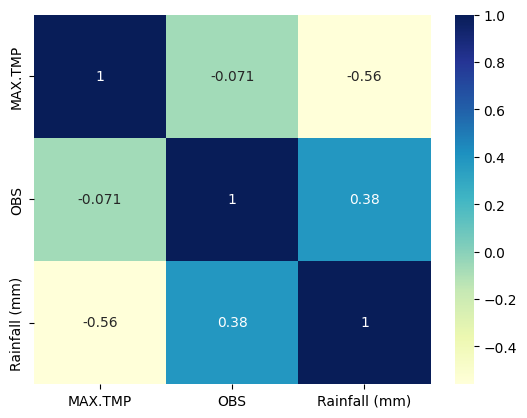

In [32]:
corrln = df_merged[['MAX.TMP', 'OBS', 'Rainfall (mm)']].corr()
dataplot = sns.heatmap(corrln, cmap="YlGnBu", annot=True) 
plt.show()

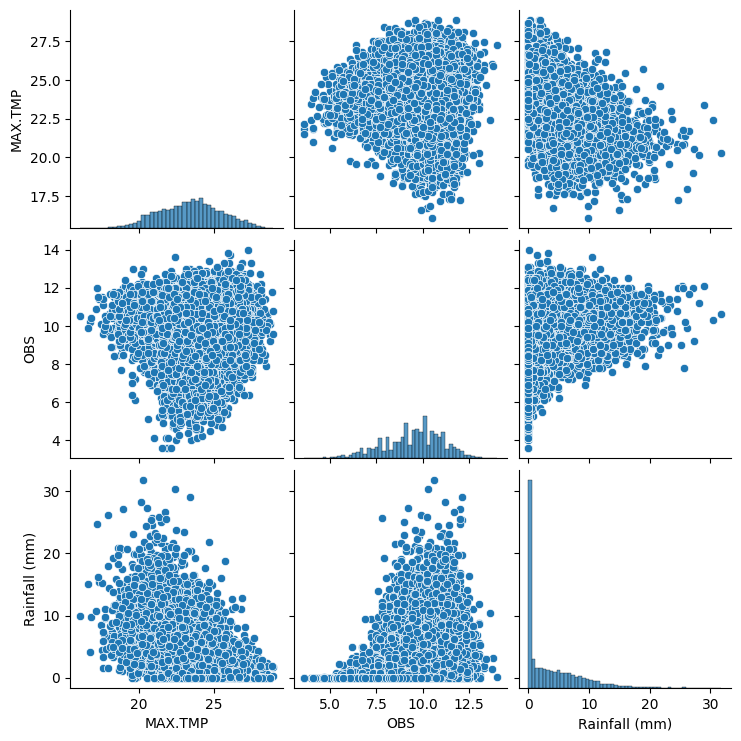

In [33]:
cols_to_plot = df_merged.columns[3:6].tolist() 
sns.pairplot(df_merged[cols_to_plot])
plt.show()